# Machine Learning Lab
## Lab 4 - Synthetic Data Generation
---
**Shyam Sundaram<br>
19BCE1560<br>
August 30, 2021<br><br>
Abdul Quadir Md<br>
L31+L32**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Creating data

In [27]:
# Create our own data

datafile = pd.DataFrame()
datafile[0] = np.arange(2000,2020)
datafile[1] = [64,54,62,78,66,69,72,77,82,88,85,87,84,85,88,75,90,93,95,98]
datafile1 = pd.DataFrame()
datafile1[0] = np.arange(2000,2020)
datafile1[1] = np.random.randint(65,90,size=20)#[22,34,50,78,66,69,72,77,64,54,62,78,88,79,89,85,86,90,92,89]
datafile.columns =["Year","Placement"]
datafile1.columns =["Year","Placement"]
print(datafile)
print(datafile1)

    Year  Placement
0   2000         64
1   2001         54
2   2002         62
3   2003         78
4   2004         66
5   2005         69
6   2006         72
7   2007         77
8   2008         82
9   2009         88
10  2010         85
11  2011         87
12  2012         84
13  2013         85
14  2014         88
15  2015         75
16  2016         90
17  2017         93
18  2018         95
19  2019         98
    Year  Placement
0   2000         79
1   2001         79
2   2002         77
3   2003         73
4   2004         69
5   2005         89
6   2006         79
7   2007         80
8   2008         84
9   2009         70
10  2010         65
11  2011         83
12  2012         72
13  2013         70
14  2014         87
15  2015         69
16  2016         80
17  2017         88
18  2018         72
19  2019         74


No handles with labels found to put in legend.


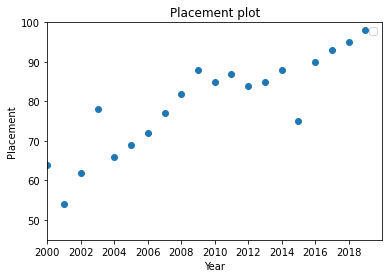

In [28]:
plt.scatter(datafile['Year'],datafile['Placement'])
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

# Correlation

In [16]:
import seaborn as sb

<AxesSubplot:>

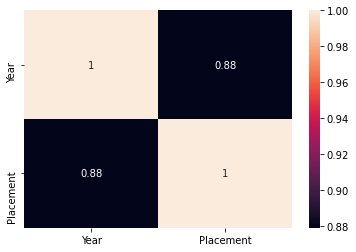

In [29]:
data_corr = datafile.corr()
sb.heatmap(data_corr,annot=True)

<AxesSubplot:>

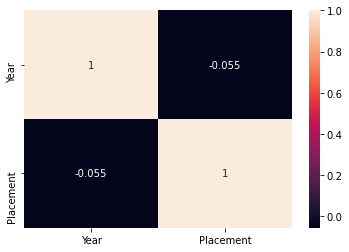

In [49]:
data_corr = datafile1.corr()
sb.heatmap(data_corr,annot=True)

# Training Regression model
---

In [30]:
from sklearn import linear_model

In [31]:
regress = linear_model.LinearRegression()

## Separating attributes and target

In [32]:
train_x = np.asanyarray(datafile[['Year']])
train_y = np.asanyarray(datafile[['Placement']])
print(train_x)
print(train_y)

[[2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[[64]
 [54]
 [62]
 [78]
 [66]
 [69]
 [72]
 [77]
 [82]
 [88]
 [85]
 [87]
 [84]
 [85]
 [88]
 [75]
 [90]
 [93]
 [95]
 [98]]


## Training the model

In [33]:
regress.fit (train_x,train_y)

LinearRegression()

## The coefficients: slope and intercept

In [34]:
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.78345865]]
Intercept:  [-3504.26015038]


## Plotting the regression line

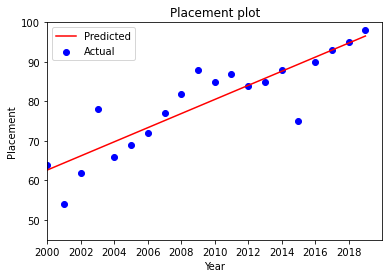

In [35]:
plt.scatter(datafile.Year, datafile.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress.coef_[0][0]*train_x + regress.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

## Regression model for second dataset

In [36]:
regress1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(datafile1[['Year']])
train_y1 = np.asanyarray(datafile1[['Placement']])
# print(train_x)
# print(train_y)

regress1.fit (train_x1,train_y1)
# The coefficients
print ('Coefficients: ', regress1.coef_)
print ('Intercept: ',regress1.intercept_)

Coefficients:  [[-0.06541353]]
Intercept:  [208.39849624]


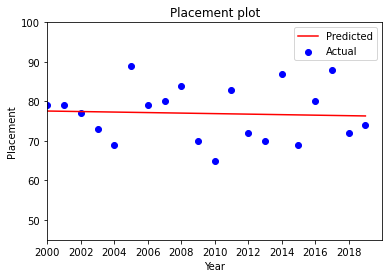

In [37]:
plt.scatter(datafile1.Year, datafile1.Placement,  color='blue',label="Actual")
plt.plot(train_x, regress1.coef_[0][0]*train_x1 + regress1.intercept_[0], '-r',label="Predicted")
plt.title("Placement plot")
plt.xlim(2000,2020)
plt.ylim(45,100)
plt.xticks(np.arange(2000,2020,2))
plt.legend()
plt.xlabel("Year")
plt.ylabel("Placement")
plt.show()

# Predicting Values
---

In [38]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
datafile['Predicted'] = y_predicted
print(y_predicted)
print(datafile.head())

[64] [62.65714286]
[54] [64.4406015]
[62] [66.22406015]
[78] [68.0075188]
[66] [69.79097744]
[69] [71.57443609]
[72] [73.35789474]
[77] [75.14135338]
[82] [76.92481203]
[88] [78.70827068]
[85] [80.49172932]
[87] [82.27518797]
[84] [84.05864662]
[85] [85.84210526]
[88] [87.62556391]
[75] [89.40902256]
[90] [91.1924812]
[93] [92.97593985]
[95] [94.7593985]
[98] [96.54285714]
[[62.65714286]
 [64.4406015 ]
 [66.22406015]
 [68.0075188 ]
 [69.79097744]
 [71.57443609]
 [73.35789474]
 [75.14135338]
 [76.92481203]
 [78.70827068]
 [80.49172932]
 [82.27518797]
 [84.05864662]
 [85.84210526]
 [87.62556391]
 [89.40902256]
 [91.1924812 ]
 [92.97593985]
 [94.7593985 ]
 [96.54285714]]
   Year  Placement  Predicted
0  2000         64  62.657143
1  2001         54  64.440602
2  2002         62  66.224060
3  2003         78  68.007519
4  2004         66  69.790977


## Measuring performance

Any of the following metrics may be used:

Mean absolute error: It is the average of the absolute value of all the errors.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. This is efficient since the focus is on large errors and doesnot consider sign of error.


Root Mean Squared Error (RMSE): This is a metric to calculate the accuracy of the model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).




accuracy - 10/20 is the accu==50%

loss ---total errors happened in the system.


 reduce the loss automatically the model becomes more accurate

In [39]:
from sklearn import metrics

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(train_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(train_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(train_y, y_predicted)))

Mean Absolute Error: 3.8890225563910006
Mean Squared Error: 31.08090225563971
Root Mean Squared Error: 5.575024865921201


In [41]:
from sklearn.metrics import r2_score

In [42]:
test_x = np.asanyarray(datafile[['Year']])
test_y = np.asanyarray(datafile[['Placement']])
test_y_predicted = regress.predict(test_x)

In [43]:
print("Mean absolute error (MAE):" , np.mean(np.absolute(test_y_predicted - test_y)))
print("Mean square error (MSE): " , np.mean((test_y_predicted - test_y) ** 2))
print("R2-score: %.2f (RMSE):" , r2_score(test_y, test_y_predicted) )

Mean absolute error (MAE): 3.8890225563910006
Mean square error (MSE):  31.08090225563971
R2-score: %.2f (RMSE): 0.7728668353139454


# Splitting data: Training and testing
---

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
train_x, test_x, train_y, test_y = train_test_split(datafile[['Year']], datafile[['Placement']], test_size=0.30, random_state=42)
print(train_x)
print("Testing")
print(test_x)

    Year
11  2011
3   2003
18  2018
16  2016
13  2013
2   2002
9   2009
19  2019
4   2004
12  2012
7   2007
10  2010
14  2014
6   2006
Testing
    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005


## Training on training data

In [46]:
regress = linear_model.LinearRegression()
regress.fit (train_x,train_y)
# The coefficients
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[1.73830735]]
Intercept:  [-3411.99443207]


## Evaluating with testing data

In [47]:
y_predicted = regress.predict(test_x)
print(test_x)
print(test_y)
print(y_predicted)

    Year
0   2000
17  2017
15  2015
1   2001
8   2008
5   2005
    Placement
0          64
17         93
15         75
1          54
8          82
5          69
[[64.62026726]
 [94.1714922 ]
 [90.69487751]
 [66.35857461]
 [78.52672606]
 [73.31180401]]


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_predicted)))

Mean Absolute Error: 6.271714922049114
Mean Squared Error: 71.91265957675672
Root Mean Squared Error: 8.480133228715026
